In [1]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle

In [2]:
cloud_config= {'secure_connect_bundle': r'D:\python\pred_main\cassandra\secure-connect-jet-engine-rul.zip'}
auth_provider = PlainTextAuthProvider('UcWSmrCpkFeOtCIyQxAYGOSI',
                                      '36TT,OlgrisgZp8L5srzNuIoZzfde,Q6GFzKk,B-G3WrnJxqcD-n2rZlRQ-UYq.aA-qN4mPAcMI9,i-9jJ+Ujt43fe3qTu5gWQuG,12HGZJZkZv9qj8pQ6+LCbyb+QlZ')
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)

In [3]:
session = cluster.connect('machine_learning')
session.execute("USE machine_learning;")

In [4]:
col = ["engine", "cycles", "os1", "os2", "os3", "sm1", "sm2", "sm3", "sm4", "sm5", "sm6", "sm7", "sm8", "sm9", "sm10", "sm11", "sm12", "sm13", "sm14", "sm15", "sm16", "sm17", "sm18", "sm19", "sm20", "sm21" ]

train3 = pd.DataFrame(session.execute("SELECT * FROM train3fd;")).set_index("slno").sort_index()
train3 = train3.reindex(columns = col)

In [5]:
test3 = pd.DataFrame(session.execute("SELECT * FROM test3fd;")).set_index("slno").sort_index()
test3 = test3.reindex(columns = col)

In [6]:
rul3 = pd.DataFrame(session.execute("SELECT * FROM rul3fd;")).set_index("slno").sort_index()

In [7]:
print(train3.shape)
print(test3.shape)
print(rul3.shape)

(24720, 26)
(16596, 26)
(100, 1)


In [8]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24720 entries, 0 to 24719
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   engine  24720 non-null  int64  
 1   cycles  24720 non-null  int64  
 2   os1     24720 non-null  float64
 3   os2     24720 non-null  float64
 4   os3     24720 non-null  int64  
 5   sm1     24720 non-null  float64
 6   sm2     24720 non-null  float64
 7   sm3     24720 non-null  float64
 8   sm4     24720 non-null  float64
 9   sm5     24720 non-null  float64
 10  sm6     24720 non-null  float64
 11  sm7     24720 non-null  float64
 12  sm8     24720 non-null  float64
 13  sm9     24720 non-null  float64
 14  sm10    24720 non-null  float64
 15  sm11    24720 non-null  float64
 16  sm12    24720 non-null  float64
 17  sm13    24720 non-null  float64
 18  sm14    24720 non-null  float64
 19  sm15    24720 non-null  float64
 20  sm16    24720 non-null  float64
 21  sm17    24720 non-null  int64  
 22

In [9]:
train3

,engine,cycles,os1,os2,os3,sm1,sm2,sm3,sm4,sm5,...,sm12,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21
slno,,,,,,,,,,,,,,,,,,,,,
0,1,1,-0.0005,0.0004,100,518.669983,642.359985,1583.229980,1396.839966,14.62,...,522.309998,2388.010010,8145.319824,8.4246,0.03,391,2388,100,39.110001,23.353701
1,1,2,0.0008,-0.0003,100,518.669983,642.500000,1584.689941,1396.890015,14.62,...,522.419983,2388.030029,8152.850098,8.4403,0.03,392,2388,100,38.990002,23.449100
2,1,3,-0.0014,-0.0002,100,518.669983,642.179993,1582.349976,1405.609985,14.62,...,522.030029,2388.000000,8150.169922,8.3901,0.03,391,2388,100,38.849998,23.366899
3,1,4,-0.0020,0.0001,100,518.669983,642.919983,1585.609985,1392.270020,14.62,...,522.489990,2388.080078,8146.560059,8.3878,0.03,392,2388,100,38.959999,23.295099
4,1,5,0.0016,0.0000,100,518.669983,641.679993,1588.630005,1397.650024,14.62,...,522.580017,2388.030029,8147.799805,8.3869,0.03,392,2388,100,39.139999,23.458300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,100,518.669983,643.780029,1596.010010,1424.109985,14.62,...,519.659973,2388.300049,8138.080078,8.5036,0.03,394,2388,100,38.439999,22.963100
24716,100,149,0.0034,-0.0003,100,518.669983,643.289978,1596.380005,1429.140015,14.62,...,519.909973,2388.280029,8144.359863,8.5174,0.03,395,2388,100,38.500000,22.974600
24717,100,150,-0.0016,0.0004,100,518.669983,643.840027,1604.530029,1431.410034,14.62,...,519.440002,2388.239990,8135.950195,8.5223,0.03,396,2388,100,38.389999,23.068199


In [10]:
test3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16596 entries, 0 to 16595
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   engine  16596 non-null  int64  
 1   cycles  16596 non-null  int64  
 2   os1     16596 non-null  float64
 3   os2     16596 non-null  float64
 4   os3     16596 non-null  int64  
 5   sm1     16596 non-null  float64
 6   sm2     16596 non-null  float64
 7   sm3     16596 non-null  float64
 8   sm4     16596 non-null  float64
 9   sm5     16596 non-null  float64
 10  sm6     16596 non-null  float64
 11  sm7     16596 non-null  float64
 12  sm8     16596 non-null  float64
 13  sm9     16596 non-null  float64
 14  sm10    16596 non-null  float64
 15  sm11    16596 non-null  float64
 16  sm12    16596 non-null  float64
 17  sm13    16596 non-null  float64
 18  sm14    16596 non-null  float64
 19  sm15    16596 non-null  float64
 20  sm16    16596 non-null  float64
 21  sm17    16596 non-null  int64  
 22

In [11]:
rul3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   rul     100 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [12]:
train3.describe().T

,count,mean,std,min,25%,50%,75%,max
engine,24720.0,48.631877,29.348985,1.000000,23.000000,47.000000,74.000000,100.000000
cycles,24720.0,139.077063,98.846675,1.000000,62.000000,124.000000,191.000000,525.000000
os1,24720.0,-0.000024,0.002194,-0.008600,-0.001500,0.000000,0.001500,0.008600
os2,24720.0,0.000005,0.000294,-0.000600,-0.000200,0.000000,0.000300,0.000700
os3,24720.0,100.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000
sm1,24720.0,518.669983,0.000000,518.669983,518.669983,518.669983,518.669983,518.669983
sm2,24720.0,642.457858,0.523031,640.840027,642.080017,642.400024,642.789978,645.109985
sm3,24720.0,1588.079175,6.810418,1564.300049,1583.280029,1587.520020,1592.412537,1615.390015
sm4,24720.0,1404.471212,9.773178,1377.060059,1397.187469,1402.910034,1410.599976,1441.160034
sm5,24720.0,14.620000,0.000000,14.620000,14.620000,14.620000,14.620000,14.620000


In [15]:
test3.describe().T

,count,mean,std,min,25%,50%,75%,max
engine,16596.0,51.887383,29.853523,1.000000,24.000000,52.000000,78.000000,100.000000
cycles,16596.0,105.999518,83.286900,1.000000,42.000000,87.000000,149.000000,475.000000
os1,16596.0,-0.000017,0.002201,-0.008700,-0.001500,0.000000,0.001500,0.008300
os2,16596.0,-0.000004,0.000294,-0.000600,-0.000300,0.000000,0.000300,0.000600
os3,16596.0,100.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000
sm1,16596.0,518.669983,0.000000,518.669983,518.669983,518.669983,518.669983,518.669983
sm2,16596.0,642.267980,0.418850,640.909973,641.979980,642.239990,642.549988,644.030029
sm3,16596.0,1585.608286,5.538577,1565.079956,1581.847473,1585.459961,1589.239990,1607.130005
sm4,16596.0,1400.567943,7.150365,1379.380005,1395.439941,1399.839966,1405.229980,1430.209961
sm5,16596.0,14.620000,0.000000,14.620000,14.620000,14.620000,14.620000,14.620000


In [16]:
rul3.describe().T

,count,mean,std,min,25%,50%,75%,max
rul,100.0,75.32,41.604166,6.0,43.25,77.5,115.0,145.0


In [17]:
train3

,engine,cycles,os1,os2,os3,sm1,sm2,sm3,sm4,sm5,...,sm12,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21
slno,,,,,,,,,,,,,,,,,,,,,
0,1,1,-0.0005,0.0004,100,518.669983,642.359985,1583.229980,1396.839966,14.62,...,522.309998,2388.010010,8145.319824,8.4246,0.03,391,2388,100,39.110001,23.353701
1,1,2,0.0008,-0.0003,100,518.669983,642.500000,1584.689941,1396.890015,14.62,...,522.419983,2388.030029,8152.850098,8.4403,0.03,392,2388,100,38.990002,23.449100
2,1,3,-0.0014,-0.0002,100,518.669983,642.179993,1582.349976,1405.609985,14.62,...,522.030029,2388.000000,8150.169922,8.3901,0.03,391,2388,100,38.849998,23.366899
3,1,4,-0.0020,0.0001,100,518.669983,642.919983,1585.609985,1392.270020,14.62,...,522.489990,2388.080078,8146.560059,8.3878,0.03,392,2388,100,38.959999,23.295099
4,1,5,0.0016,0.0000,100,518.669983,641.679993,1588.630005,1397.650024,14.62,...,522.580017,2388.030029,8147.799805,8.3869,0.03,392,2388,100,39.139999,23.458300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,100,518.669983,643.780029,1596.010010,1424.109985,14.62,...,519.659973,2388.300049,8138.080078,8.5036,0.03,394,2388,100,38.439999,22.963100
24716,100,149,0.0034,-0.0003,100,518.669983,643.289978,1596.380005,1429.140015,14.62,...,519.909973,2388.280029,8144.359863,8.5174,0.03,395,2388,100,38.500000,22.974600
24717,100,150,-0.0016,0.0004,100,518.669983,643.840027,1604.530029,1431.410034,14.62,...,519.440002,2388.239990,8135.950195,8.5223,0.03,396,2388,100,38.389999,23.068199


In [18]:
test3

,engine,cycles,os1,os2,os3,sm1,sm2,sm3,sm4,sm5,...,sm12,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21
slno,,,,,,,,,,,,,,,,,,,,,
0,1,1,-0.0017,-0.0004,100,518.669983,641.940002,1581.930054,1396.930054,14.62,...,521.890015,2387.939941,8133.479980,8.3760,0.03,391,2388,100,39.070000,23.446800
1,1,2,0.0006,-0.0002,100,518.669983,642.020020,1584.859985,1398.900024,14.62,...,521.849976,2388.010010,8137.439941,8.4062,0.03,391,2388,100,39.040001,23.480700
2,1,3,0.0014,-0.0003,100,518.669983,641.679993,1581.780029,1391.920044,14.62,...,522.099976,2387.939941,8138.250000,8.3553,0.03,391,2388,100,39.099998,23.424400
3,1,4,0.0027,0.0001,100,518.669983,642.200012,1584.530029,1395.339966,14.62,...,522.450012,2387.959961,8137.069824,8.3709,0.03,392,2388,100,38.970001,23.478201
4,1,5,-0.0001,0.0001,100,518.669983,642.460022,1589.030029,1395.859985,14.62,...,521.909973,2387.969971,8134.200195,8.4146,0.03,391,2388,100,39.090000,23.395000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,100,243,0.0011,-0.0003,100,518.669983,643.039978,1594.989990,1411.280029,14.62,...,529.229980,2388.239990,8162.240234,8.2939,0.03,395,2388,100,39.400002,23.494900
16592,100,244,-0.0024,0.0002,100,518.669983,642.469971,1591.270020,1417.640015,14.62,...,529.270020,2388.260010,8163.240234,8.3247,0.03,394,2388,100,39.419998,23.601101
16593,100,245,-0.0053,0.0002,100,518.669983,642.700012,1593.810059,1412.699951,14.62,...,529.479980,2388.280029,8162.120117,8.3264,0.03,394,2388,100,39.430000,23.548201


In [19]:
rul3

,rul
slno,
0,44
1,51
2,27
3,120
4,101
...,...
95,113
96,123
97,17


In [20]:
train3

,engine,cycles,os1,os2,os3,sm1,sm2,sm3,sm4,sm5,...,sm12,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21
slno,,,,,,,,,,,,,,,,,,,,,
0,1,1,-0.0005,0.0004,100,518.669983,642.359985,1583.229980,1396.839966,14.62,...,522.309998,2388.010010,8145.319824,8.4246,0.03,391,2388,100,39.110001,23.353701
1,1,2,0.0008,-0.0003,100,518.669983,642.500000,1584.689941,1396.890015,14.62,...,522.419983,2388.030029,8152.850098,8.4403,0.03,392,2388,100,38.990002,23.449100
2,1,3,-0.0014,-0.0002,100,518.669983,642.179993,1582.349976,1405.609985,14.62,...,522.030029,2388.000000,8150.169922,8.3901,0.03,391,2388,100,38.849998,23.366899
3,1,4,-0.0020,0.0001,100,518.669983,642.919983,1585.609985,1392.270020,14.62,...,522.489990,2388.080078,8146.560059,8.3878,0.03,392,2388,100,38.959999,23.295099
4,1,5,0.0016,0.0000,100,518.669983,641.679993,1588.630005,1397.650024,14.62,...,522.580017,2388.030029,8147.799805,8.3869,0.03,392,2388,100,39.139999,23.458300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,100,518.669983,643.780029,1596.010010,1424.109985,14.62,...,519.659973,2388.300049,8138.080078,8.5036,0.03,394,2388,100,38.439999,22.963100
24716,100,149,0.0034,-0.0003,100,518.669983,643.289978,1596.380005,1429.140015,14.62,...,519.909973,2388.280029,8144.359863,8.5174,0.03,395,2388,100,38.500000,22.974600
24717,100,150,-0.0016,0.0004,100,518.669983,643.840027,1604.530029,1431.410034,14.62,...,519.440002,2388.239990,8135.950195,8.5223,0.03,396,2388,100,38.389999,23.068199


In [21]:
drop_col = ["os1", "os2", "os3", "sm1", "sm5", "sm6", "sm10", "sm16", "sm18", "sm19"]
train3.drop(columns = drop_col, inplace = True)
test3.drop(columns = drop_col, inplace = True)

In [22]:
rul3.insert(0, 'engine', range(1,101))

In [23]:
n_engine = train3['engine'].unique()
print(n_engine)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


In [24]:
last_cycle_train_engine = train3.groupby(['engine'])['cycles'].count().values
print(last_cycle_train_engine)

[259 253 222 272 213 278 424 267 406 481 197 170 185 207 202 344 312 447
 229 338 220 192 196 494 193 243 320 200 223 218 183 189 231 459 231 324
 324 201 288 188 295 193 321 180 205 204 269 174 256 161 190 222 164 194
 525 195 215 178 299 190 199 246 231 195 234 165 263 201 170 172 409 232
 215 193 259 153 255 221 166 147 347 285 181 226 266 341 172 322 207 181
 156 158 171 392 166 491 275 307 145 152]


In [25]:
last_cycle_test_engine = test3.groupby(['engine'])['cycles'].count().values
print(last_cycle_test_engine)

[233 124 234  68 138  64 158 192 238 131 103 146  65 169 112 126 230 244
 115 207 263 119 405 475 169 130 104  70  89 333 152 120 180 105 144  90
  47 133 310 313 101  87 133 146  88 180  56 179 211 147 118  38 108  50
 203 162 158 119 149 112  78 224 137 271  79 122 186 188 105  84 367 232
 109  68 191 180 381 279 170  85 155 194 168  76 118 174 218  41 120 206
  56 266 158 333 213 358  95 182 289 247]


In [26]:
print(list(rul3['rul']))

[44, 51, 27, 120, 101, 99, 71, 55, 55, 66, 77, 115, 115, 31, 108, 56, 136, 132, 85, 56, 18, 119, 78, 9, 58, 11, 88, 144, 124, 89, 79, 55, 71, 65, 87, 137, 145, 22, 8, 41, 131, 115, 128, 69, 111, 7, 137, 55, 135, 11, 78, 120, 87, 87, 55, 93, 88, 40, 49, 128, 129, 58, 117, 28, 115, 87, 92, 103, 100, 63, 35, 45, 99, 117, 45, 27, 86, 20, 18, 133, 15, 6, 145, 104, 56, 25, 68, 144, 41, 51, 81, 14, 67, 10, 127, 113, 123, 17, 8, 28]


In [27]:
rul_cycle = list(rul3['rul'])
max_cycle = pd.DataFrame(rul_cycle) + pd.DataFrame(test3.groupby(['engine'])['cycles'].count().values)
max_cycle.insert(0, 'engine', range(1, 1 + len(max_cycle[0])))
max_cycle.rename(columns = {0:'max_cycle'} , inplace = True)
max_cycle

,engine,max_cycle
0,1,277
1,2,175
2,3,261
3,4,188
4,5,239
...,...,...
95,96,471
96,97,218
97,98,199
98,99,297


In [28]:
test3 = test3.merge(max_cycle, on = ['engine'], how = 'left')
test3['rul'] = test3['max_cycle'] - test3['cycles']

In [29]:
def remain_rul(max_cycle):
    rul = np.arange(max_cycle-1, -1, -1)
    return rul

In [30]:
all_cycle = []
for max_cycle in last_cycle_train_engine:
    all_cycle = all_cycle + list(remain_rul(max_cycle))

all_cycle = pd.DataFrame(all_cycle, columns = ['rul'])

In [31]:
train3 = pd.concat([train3, all_cycle], axis = 1)

<AxesSubplot: >

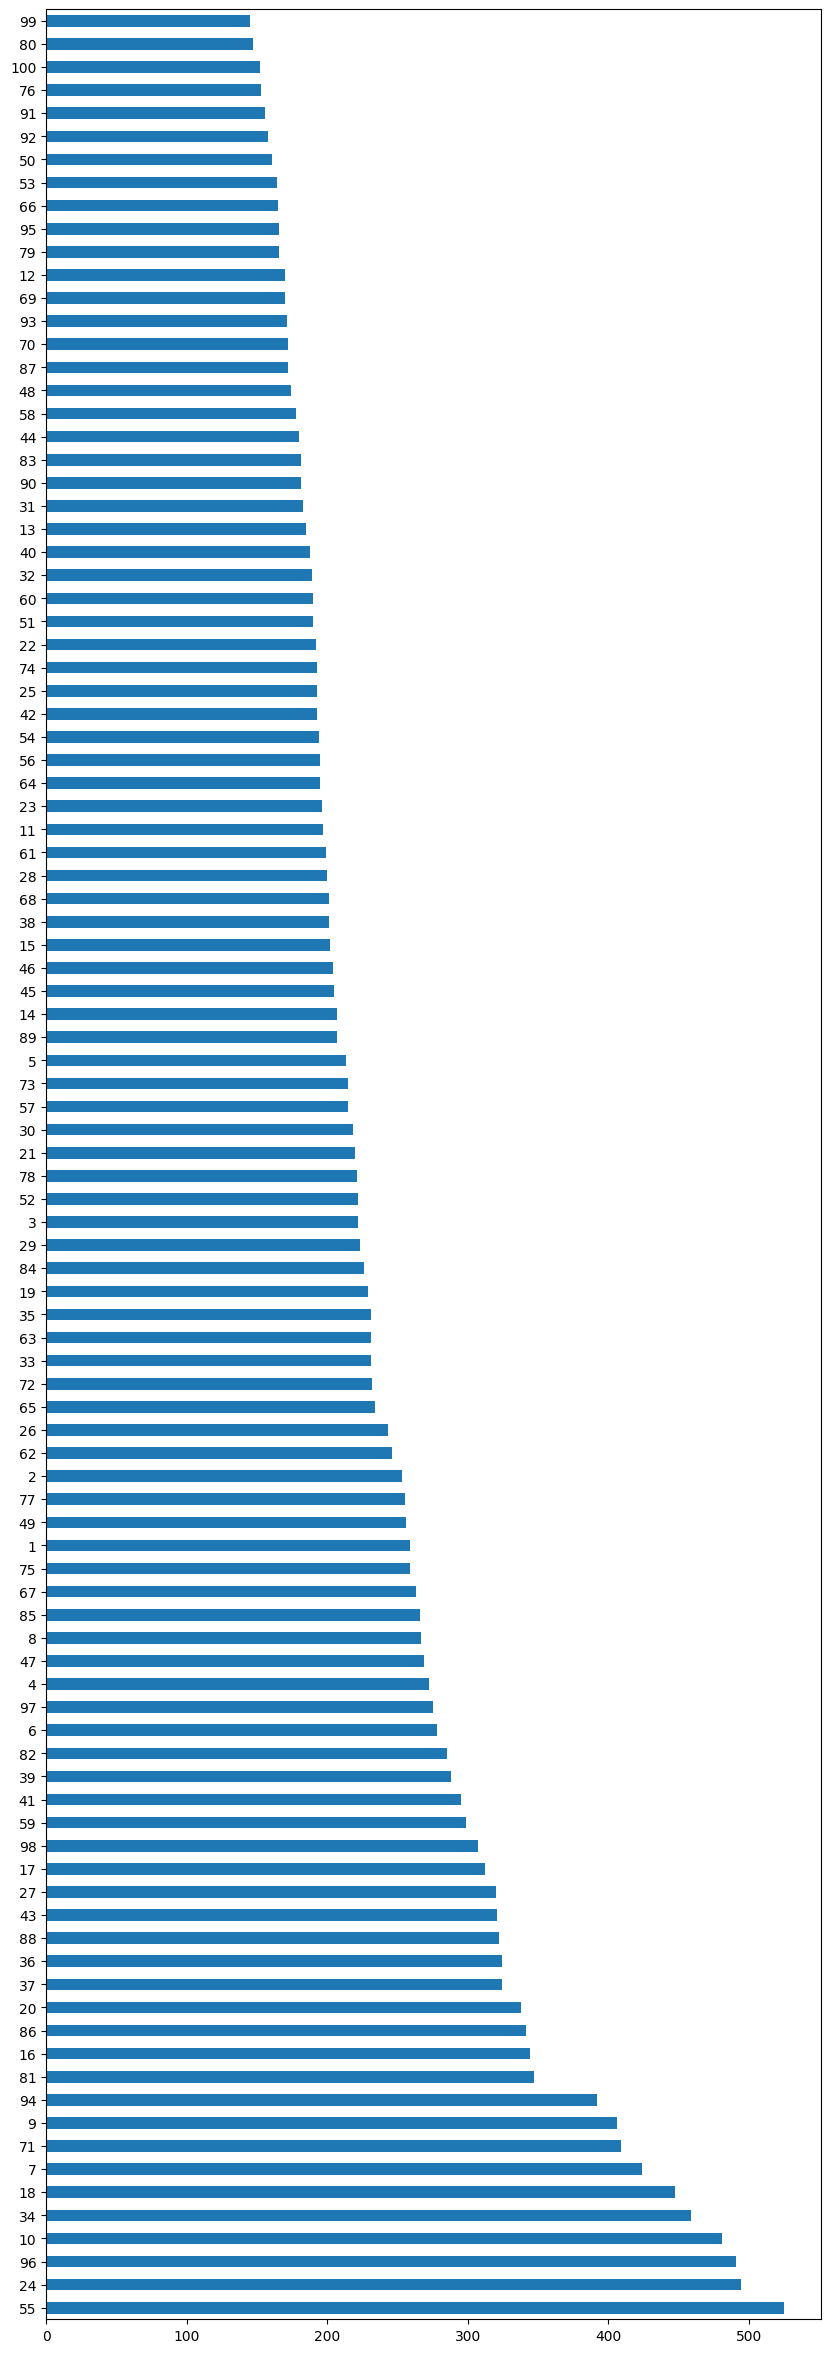

In [32]:
train3['engine'].value_counts().plot(kind='barh', figsize=(10,30))

<AxesSubplot: >

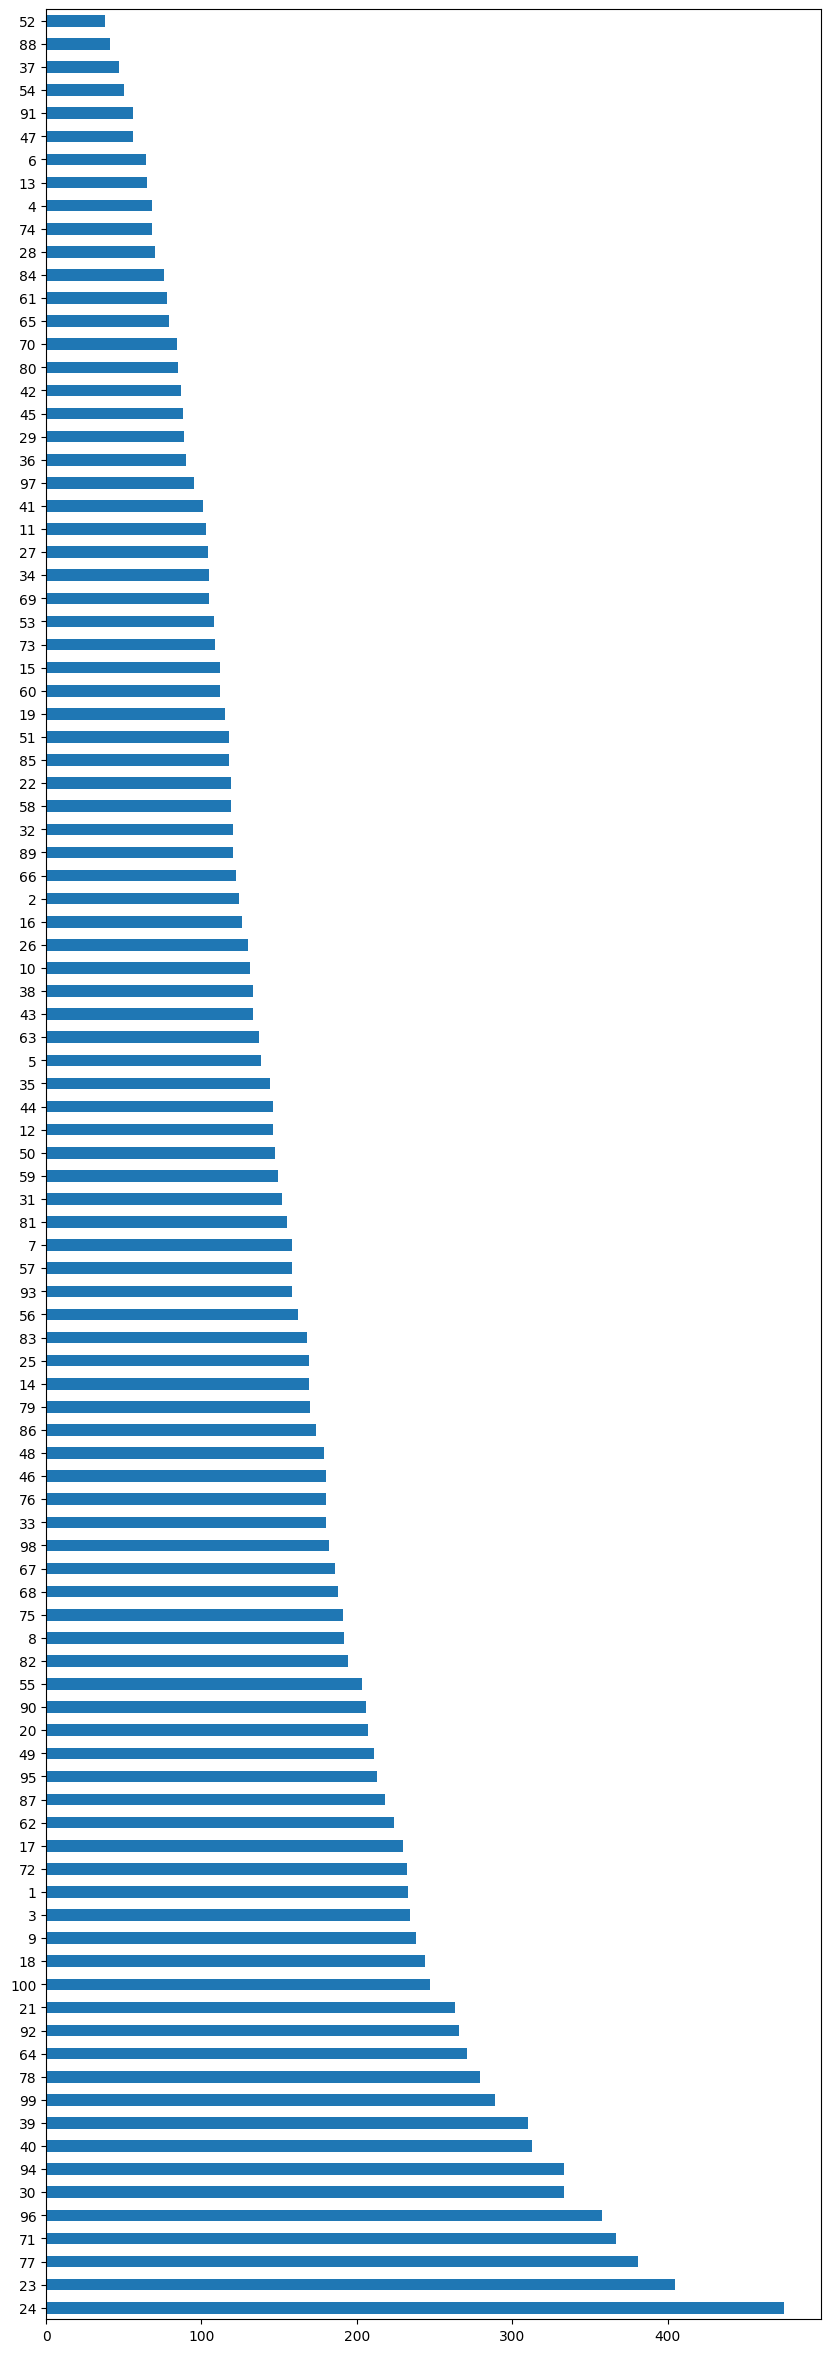

In [33]:
test3['engine'].value_counts().plot(kind = 'barh', figsize = (10,30))

In [34]:
num_engines = list(test3['engine'].unique())
print(num_engines)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [35]:
test3_pre = test3.drop_duplicates(["engine"], keep = "last").drop(["max_cycle"], axis = 1)

In [36]:
train3.columns

Index(['engine', 'cycles', 'sm2', 'sm3', 'sm4', 'sm7', 'sm8', 'sm9', 'sm11',
       'sm12', 'sm13', 'sm14', 'sm15', 'sm17', 'sm20', 'sm21', 'rul'],
      dtype='object')

In [37]:
test3_pre.columns

Index(['engine', 'cycles', 'sm2', 'sm3', 'sm4', 'sm7', 'sm8', 'sm9', 'sm11',
       'sm12', 'sm13', 'sm14', 'sm15', 'sm17', 'sm20', 'sm21', 'rul'],
      dtype='object')

In [38]:
rul3.columns

Index(['engine', 'rul'], dtype='object')

In [39]:
scaler = MinMaxScaler()

x_train = scaler.fit_transform(train3.drop(columns = ['engine','cycles','rul']))
y_train = train3['rul']
x_test = scaler.transform(test3_pre.drop(columns = ['engine','cycles','rul']))
y_test = rul3['rul']

In [40]:
rf_model = RandomForestRegressor(n_estimators= 350, max_features = "log2",
                                 n_jobs = -1, random_state = 38)
rf_model.fit(x_train, y_train)
predictions = rf_model.predict(x_test)

In [41]:
print('Train Accuracy:', np.floor(100*(rf_model.score(x_train, y_train))))

r2 = np.floor(100 *(r2_score(y_test, predictions)))
print('Coefficient of determination:', r2)

mse =  mean_squared_error(y_test, predictions)
RMSE = np.ceil(np.sqrt(mse))

print("RMSE: ", RMSE)

Train Accuracy: 95.0
Coefficient of determination: -54.0
RMSE:  52.0


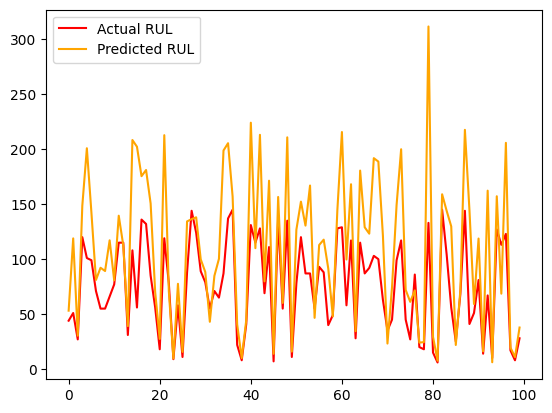

In [42]:
plt.plot(y_test, label = "Actual RUL", color = "red")
plt.plot(predictions, label = "Predicted RUL", color = "orange")
plt.legend()
plt.show()

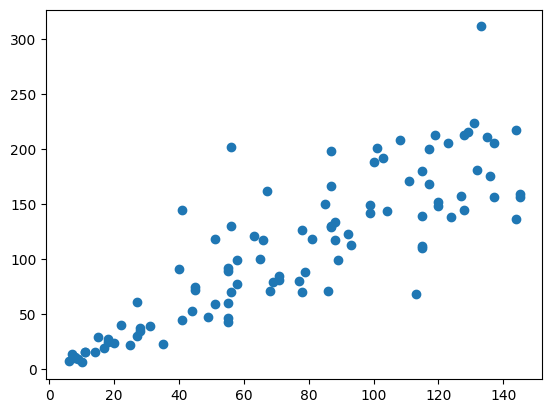

In [43]:
plt.scatter(y_test,predictions)
plt.show()

In [43]:
filename = "fd3.pkl"
pickle.dump(rf_model, open(filename,"wb"))